In [1]:
import pandas as pd
data = pd.read_csv("lending_data.csv")
print(data.head())

   loan_size  interest_rate  borrower_income  debt_to_income  num_of_accounts  \
0    10700.0          7.672            52800        0.431818                5   
1     8400.0          6.692            43600        0.311927                3   
2     9000.0          6.963            46100        0.349241                3   
3    10700.0          7.664            52700        0.430740                5   
4    10800.0          7.698            53000        0.433962                5   

   derogatory_marks  total_debt  loan_status  
0                 1       22800            0  
1                 0       13600            0  
2                 0       16100            0  
3                 1       22700            0  
4                 1       23000            0  


In [2]:
# Number of samples
num_samples = data.shape[0]

# Number of features
num_features = data.shape[1]

# Type of features
feature_types = data.dtypes

print("Number of samples:", num_samples)
print("Number of features:", num_features)
print("\nFeature types:")
print(feature_types)

Number of samples: 77536
Number of features: 8

Feature types:
loan_size           float64
interest_rate       float64
borrower_income       int64
debt_to_income      float64
num_of_accounts       int64
derogatory_marks      int64
total_debt            int64
loan_status           int64
dtype: object


In [3]:
import pandas as pd
from sklearn.impute import SimpleImputer

print("Missing values:\n", data.isnull().sum())

imputer = SimpleImputer(strategy='mean')
data = pd.DataFrame(imputer.fit_transform(data), columns=data.columns)

# Display cleaned and scaled data
print("\nCleaned Data:")
print(data)


Missing values:
 loan_size           0
interest_rate       0
borrower_income     0
debt_to_income      0
num_of_accounts     0
derogatory_marks    0
total_debt          0
loan_status         0
dtype: int64

Cleaned Data:
       loan_size  interest_rate  borrower_income  debt_to_income  \
0        10700.0          7.672          52800.0        0.431818   
1         8400.0          6.692          43600.0        0.311927   
2         9000.0          6.963          46100.0        0.349241   
3        10700.0          7.664          52700.0        0.430740   
4        10800.0          7.698          53000.0        0.433962   
...          ...            ...              ...             ...   
77531    19100.0         11.261          86600.0        0.653580   
77532    17700.0         10.662          80900.0        0.629172   
77533    17600.0         10.595          80300.0        0.626401   
77534    16300.0         10.068          75300.0        0.601594   
77535    15600.0          9.742

#EDA -Exploratory Data Analysis

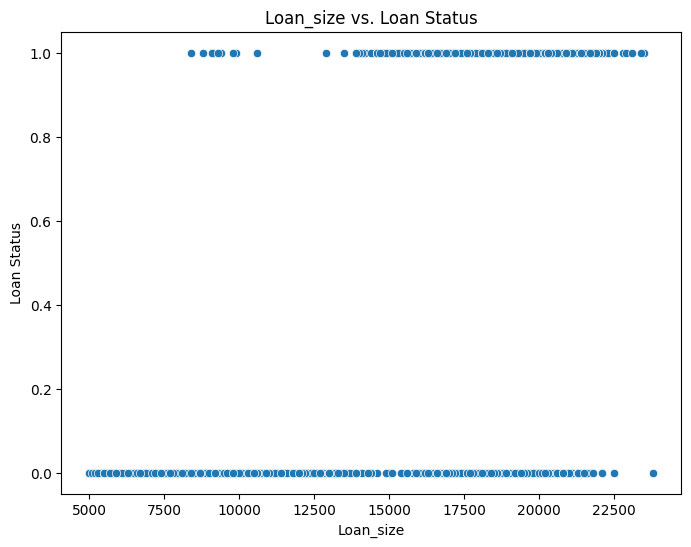

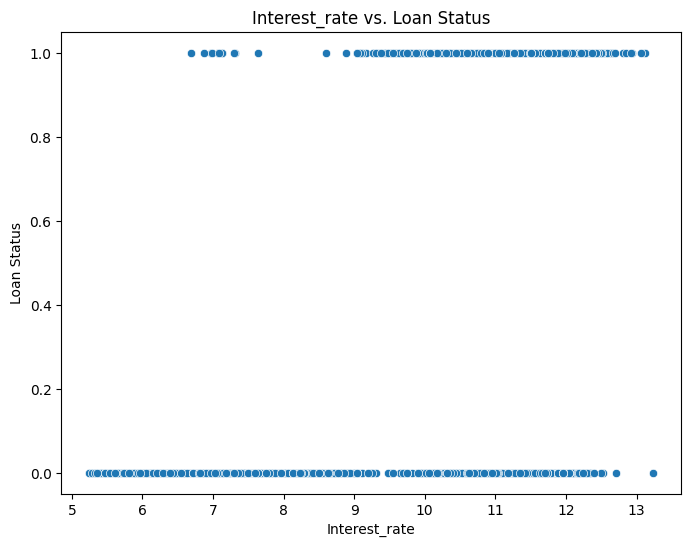

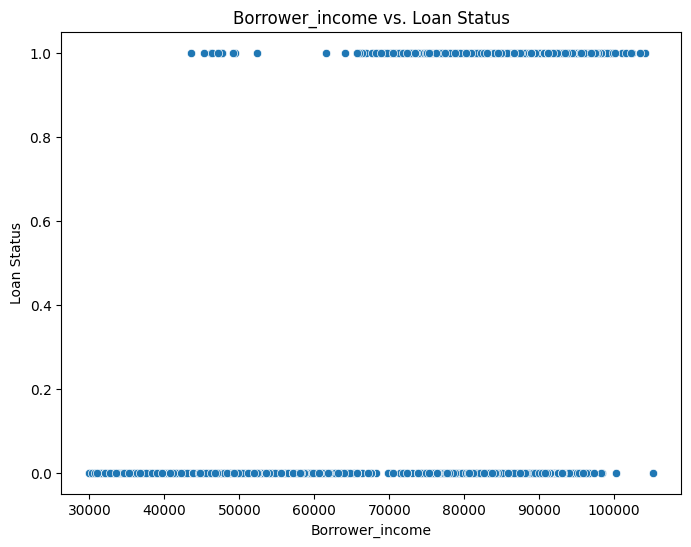

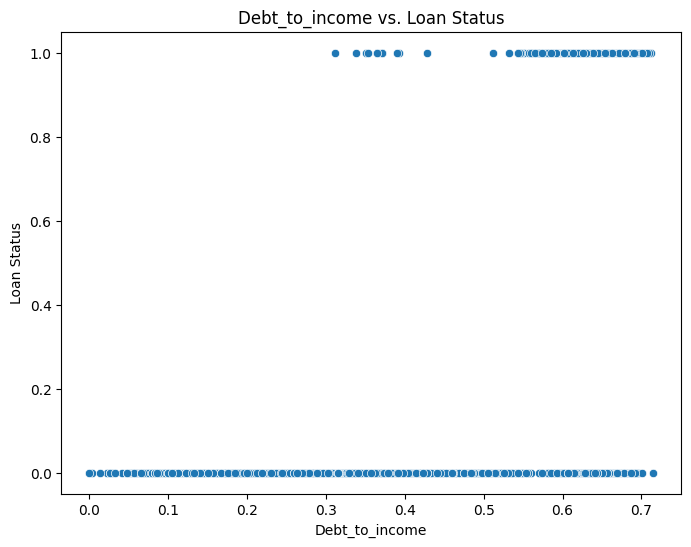

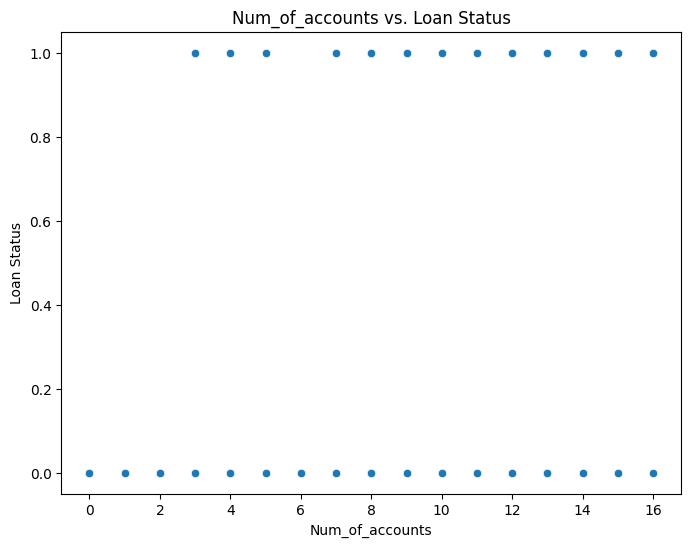

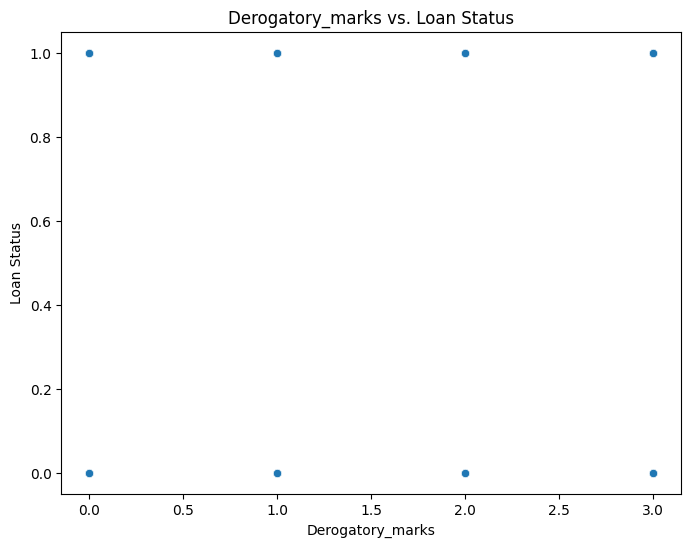

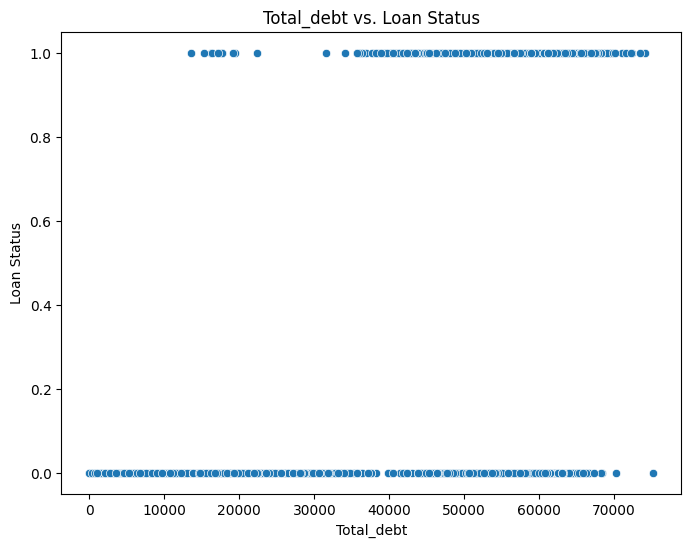

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
numerical_features = ['loan_size', 'interest_rate', 'borrower_income', 'debt_to_income',
                      'num_of_accounts', 'derogatory_marks', 'total_debt']

for feature in numerical_features:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=feature, y='loan_status', data=data)
    plt.title(f'{feature.capitalize()} vs. Loan Status')
    plt.xlabel(feature.capitalize())
    plt.ylabel('Loan Status')
    plt.show()


In [5]:
X = data.drop('loan_status', axis=1)
y = data['loan_status']

print("Shape of X (features):", X.shape)
print("Shape of y (target):", y.shape)


Shape of X (features): (77536, 7)
Shape of y (target): (77536,)


In [6]:
print("\nTarget Variable Distribution:")
print(data['loan_status'].value_counts())


Target Variable Distribution:
loan_status
0.0    75036
1.0     2500
Name: count, dtype: int64


In [7]:
import pandas as pd
from imblearn.over_sampling import RandomOverSampler

print(y.value_counts())

oversampler = RandomOverSampler(random_state=42)

# Perform oversampling
X_resampled, y_resampled = oversampler.fit_resample(X, y)

X_resampled = pd.DataFrame(X_resampled, columns=X.columns)
y_resampled = pd.Series(y_resampled, name=y.name)

print(y_resampled.value_counts())  # count after oversampling



loan_status
0.0    75036
1.0     2500
Name: count, dtype: int64
loan_status
0.0    75036
1.0    75036
Name: count, dtype: int64


In [8]:
from sklearn.model_selection import train_test_split

# Split the resampled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=54)

#Decision tree with resampled data
#Base Model without any hyperparameters and pruning

Accuracy: 0.9951690821256038
no of tree leaves before pruning:  574
Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      0.99      1.00     15059
         1.0       0.99      1.00      1.00     14956

    accuracy                           1.00     30015
   macro avg       1.00      1.00      1.00     30015
weighted avg       1.00      1.00      1.00     30015

Confusion Matrix:
                  Predicted Low Risk  Predicted High Risk
Actual Low Risk                14977                   82
Actual High Risk                  63                14893


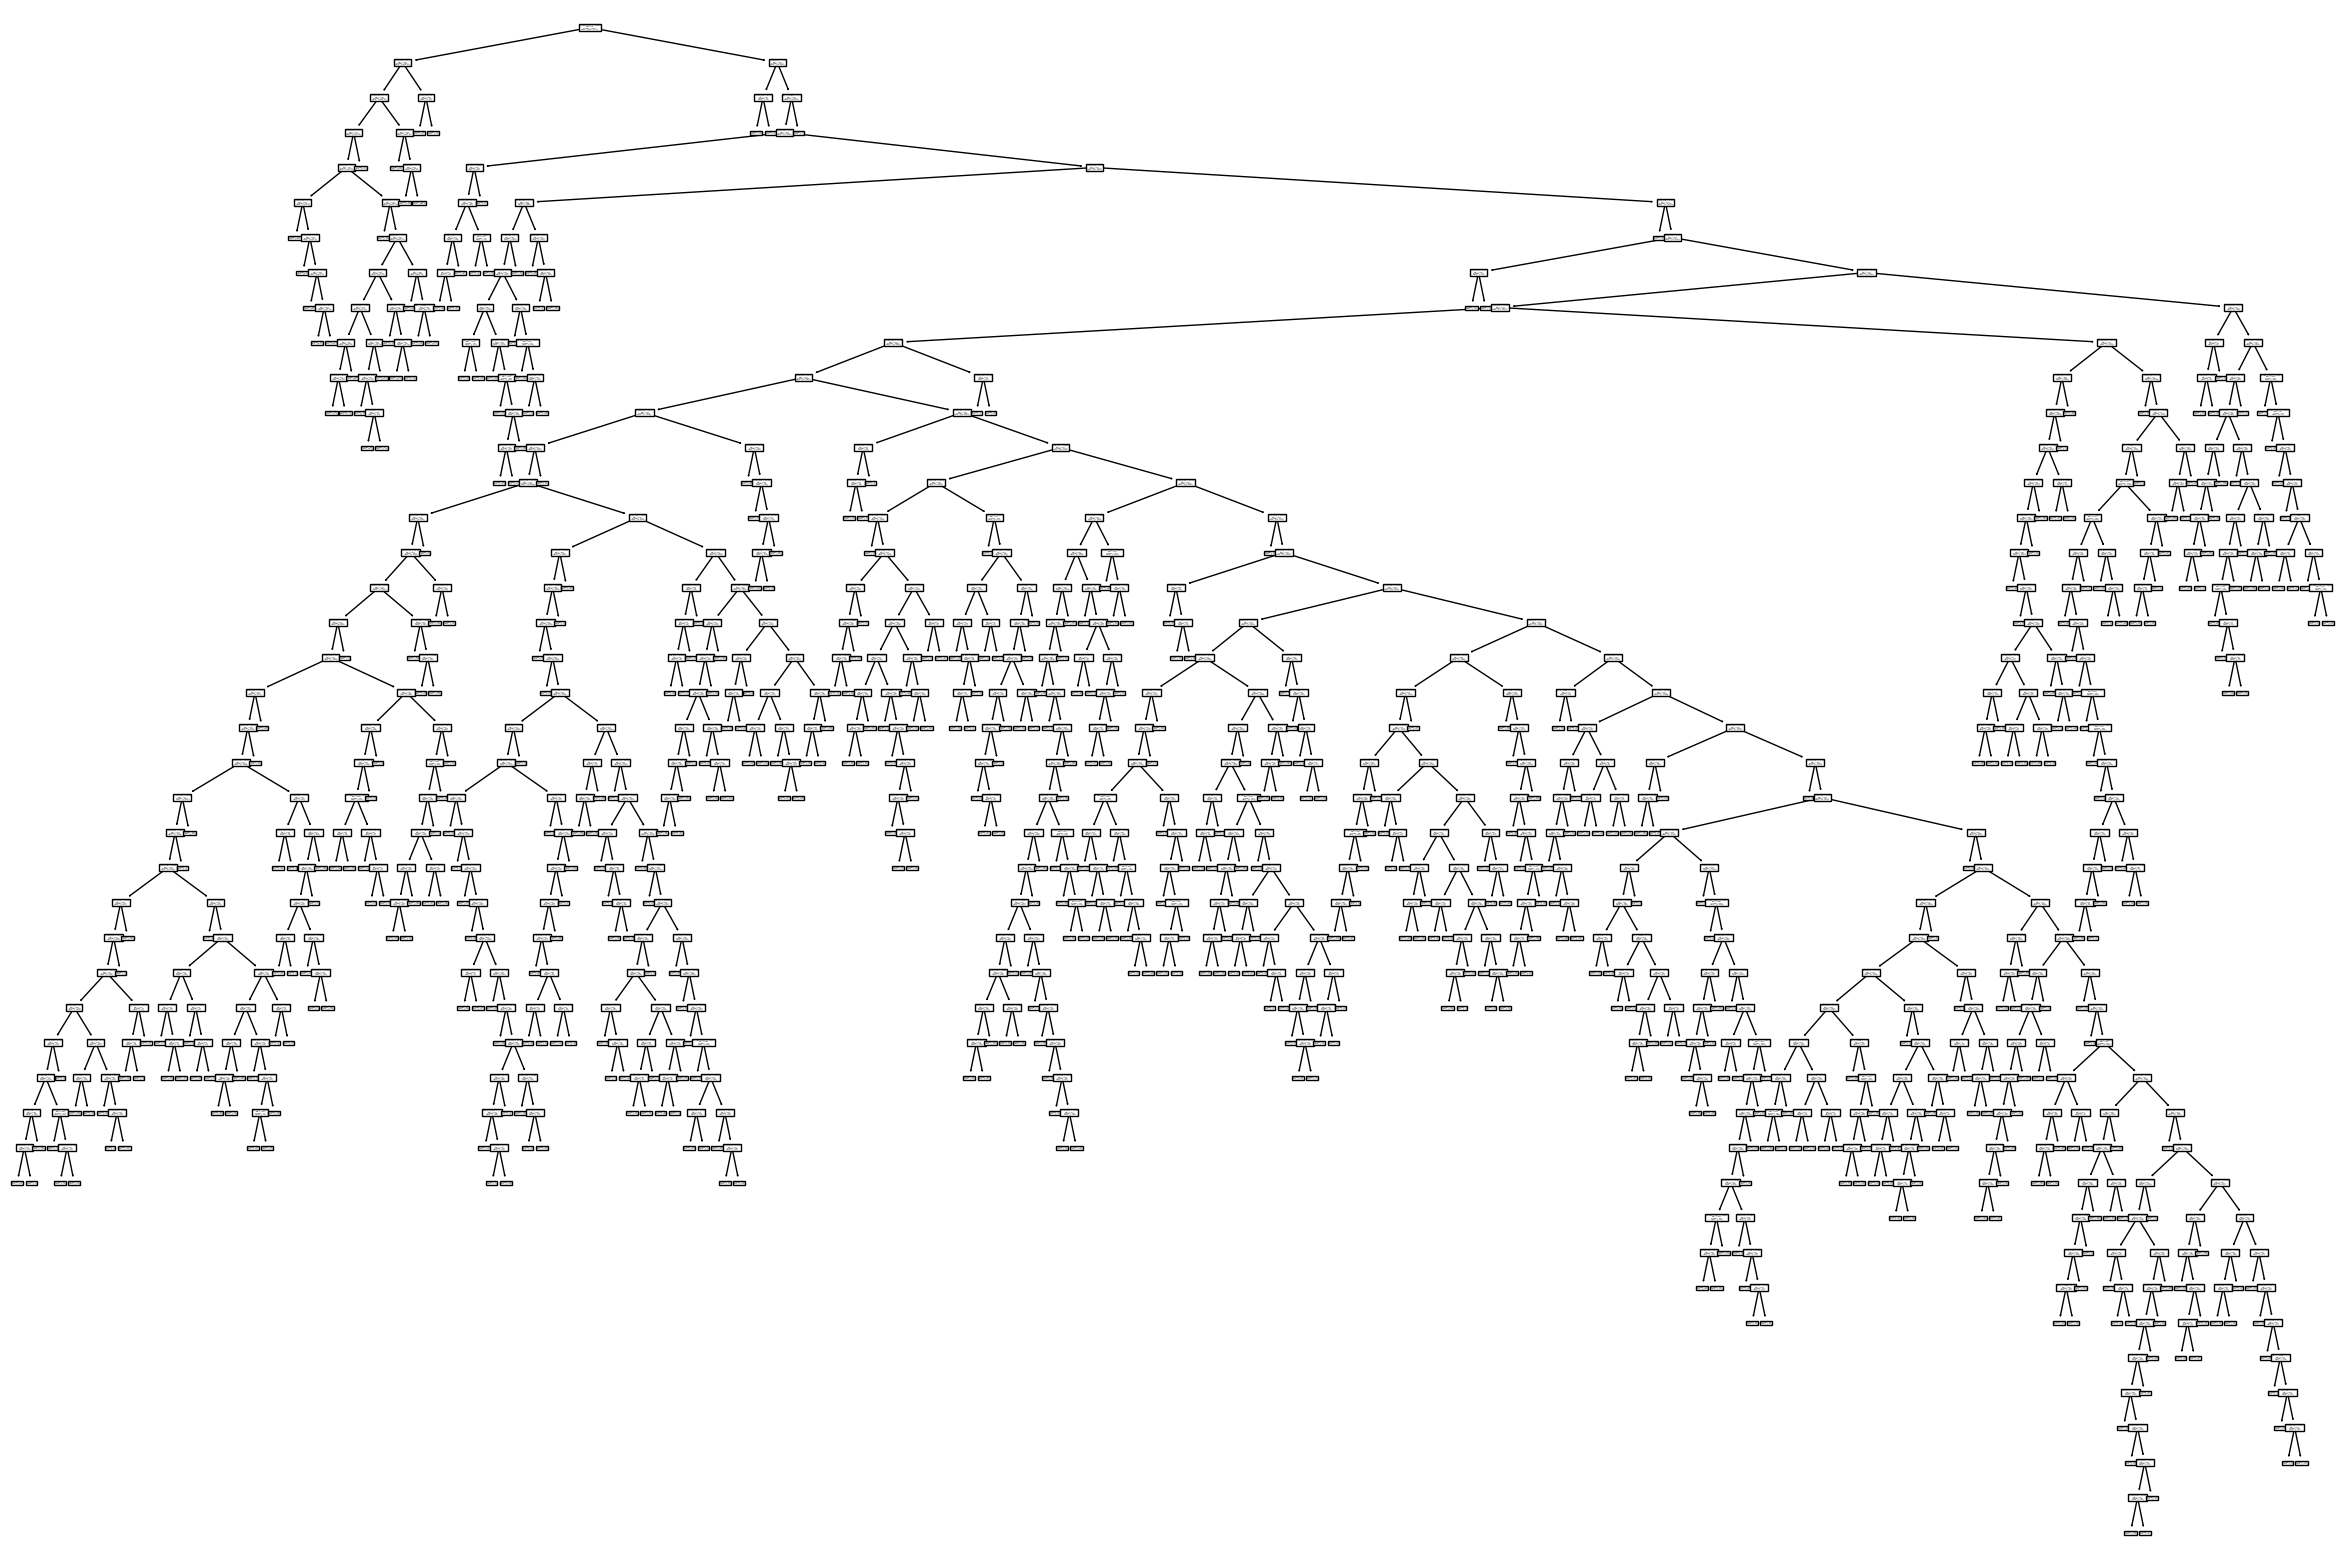

In [13]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from matplotlib.pyplot import subplots
from sklearn.tree import plot_tree

tree = DecisionTreeClassifier()

# Train the classifier on the resampled training data
tree.fit(X_train, y_train)

# Predict on the test set
y_pred = tree.predict(X_test)

# Calculate accuracy score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

#number leaves in a tree before pruning
print("no of tree leaves before pruning: ",tree.tree_.n_leaves)

def show(model,feature_names):
  ax=subplots(figsize=(30,20))[1]
  plot_tree(model,feature_names=feature_names,ax=ax)
predictors = list(X.columns)
show(tree,predictors)

# Print classification report and confusion matrix
print("Classification Report:")
print(classification_report(y_test, y_pred))

conf_matrix = confusion_matrix(y_test, y_pred)

conf_matrix_df = pd.DataFrame(conf_matrix, columns=['Predicted Low Risk', 'Predicted High Risk'], index=['Actual Low Risk', 'Actual High Risk'])
print("Confusion Matrix:")
print(conf_matrix_df)

#Feature importance calculation

In [15]:
# feature importance
feature_importance = dict(zip(X_resampled.columns, tree.feature_importances_))
sorted_feature_importance = sorted(feature_importance.items(), key=lambda x: x[1], reverse=True)
print("Feature Importance:")
for feature, importance in sorted_feature_importance:
    print(f"{feature}: {importance}")


Feature Importance:
borrower_income: 0.9912405488700495
interest_rate: 0.0076957430134407595
debt_to_income: 0.0005541164365598845
total_debt: 0.0003387196947422655
loan_size: 0.00017067699267193638
num_of_accounts: 1.9499253555956371e-07
derogatory_marks: 0.0


#Pruning and cross vadilation

In [19]:
import sklearn.model_selection as skm
# Define the parameter grid for GridSearchCV
param_grid = {
    'max_depth': [10, 15, 20],  # Different max_depth values to find which is best
    'ccp_alpha': [0.0, 0.01, 0.1, 0.2]  # Different ccp_alpha values for pruning
}

# Initialize GridSearchCV with the parameter grid and cross-validation
grid_search = skm.GridSearchCV(estimator=tree,
                           param_grid=param_grid,
                           cv=5,
                           scoring='accuracy',
                           refit=True)

# Fit GridSearchCV to find the best combination of hyperparameters
grid_search.fit(X_resampled, y_resampled)

# Get the best pruned tree model
best_tree_model = grid_search.best_estimator_

print("Best Hyperparameters:", grid_search.best_params_)

#number of leaves after tree pruned
leaves=best_tree_model.tree_.n_leaves
print("Number of tree leaves after pruning:", leaves)

#best score of gridsearch best model
print(grid_search.best_score_)

Best Hyperparameters: {'ccp_alpha': 0.0, 'max_depth': 20}
Number of tree leaves after pruning: 257
0.9952622715762794


#Logistic Regression with resampled data

In [20]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from scipy import stats

# Initialize the logistic regression model and train and test
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Get coefficients and p-values
coefficients = model.coef_[0]
p_values = [2 * (1 - stats.norm.cdf(np.abs(coef))) for coef in coefficients]

# Create a DataFrame to display coefficients and p-values
coeff_pvalues_df = pd.DataFrame({'Feature': X_train.columns, 'Coefficient': coefficients, 'P-value': p_values})
print("\nCoefficients and P-values:")
print(coeff_pvalues_df)

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix_df = pd.DataFrame(conf_matrix, columns=['Predicted 0', 'Predicted 1'], index=['Actual 0', 'Actual 1'])
print("Confusion Matrix:")
print(conf_matrix_df)

Accuracy: 0.9944694319506914

Coefficients and P-values:
            Feature   Coefficient   P-value
0         loan_size  1.686460e-03  0.998654
1     interest_rate  2.871098e-09  1.000000
2   borrower_income -6.807464e-04  0.999457
3    debt_to_income  4.587600e-06  0.999996
4   num_of_accounts  7.971109e-06  0.999994
5  derogatory_marks -1.043128e-04  0.999917
6        total_debt  6.023219e-04  0.999519
Classification Report:
              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99     15059
         1.0       0.99      0.99      0.99     14956

    accuracy                           0.99     30015
   macro avg       0.99      0.99      0.99     30015
weighted avg       0.99      0.99      0.99     30015

Confusion Matrix:
          Predicted 0  Predicted 1
Actual 0        14972           87
Actual 1           79        14877


#Cross Validation

In [21]:
from sklearn.model_selection import cross_val_score

# Perform 10-fold cross-validation on training data
cv_scores = cross_val_score(model, X_train, y_train, cv=10, scoring='accuracy')

# Calculate mean of cross-validation scores
print("Cross-Validation Scores:")
print(cv_scores)
print("Mean Accuracy:", cv_scores.mean())

# Train the model on the entire training set
model.fit(X_train, y_train)

# Evaluate model on the test set
y_pred = model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)
print("Test Set Accuracy:", test_accuracy)

Cross-Validation Scores:
[0.99450275 0.99508579 0.99558554 0.9950025  0.99408629 0.99525237
 0.99466933 0.99525198 0.99441899 0.99466889]
Mean Accuracy: 0.9948524432771814
Test Set Accuracy: 0.9944694319506914


#Random Forest

In [22]:
from sklearn.ensemble import RandomForestClassifier

rf_classifier = RandomForestClassifier(n_estimators=40, random_state=54)

rf_classifier.fit(X_train, y_train)

y_pred = rf_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy with data:", accuracy)

conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion matrix:")
print(conf_matrix)

print("Classification report:")
print(classification_report(y_test, y_pred))

feature_importance = dict(zip(X.columns, rf_classifier.feature_importances_))

sorted_feature_importance = sorted(feature_importance.items(), key=lambda x: x[1], reverse=True)

print("Feature Importance:")
for feature, importance in sorted_feature_importance:
    print(f"{feature}: {importance}")


Accuracy with data: 0.9952023988005997

Confusion matrix:
[[14978    81]
 [   63 14893]]
Classification report:
              precision    recall  f1-score   support

         0.0       1.00      0.99      1.00     15059
         1.0       0.99      1.00      1.00     14956

    accuracy                           1.00     30015
   macro avg       1.00      1.00      1.00     30015
weighted avg       1.00      1.00      1.00     30015

Feature Importance:
borrower_income: 0.24822859090202426
total_debt: 0.24818481334841552
interest_rate: 0.2055220040476314
loan_size: 0.17367978422178765
debt_to_income: 0.12435759239572519
num_of_accounts: 2.6484226018603938e-05
derogatory_marks: 7.308583973398597e-07


In [24]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation with 5 folds for random forest model
cv_scores = cross_val_score(rf_classifier, X_resampled, y_resampled, cv=5, scoring='accuracy')

# Print the cross-validation scores
print("Cross-Validation Scores:", cv_scores)
print("Mean Accuracy:", cv_scores.mean())


Cross-Validation Scores: [0.99523572 0.99586873 0.99530219 0.99560205 0.99483574]
Mean Accuracy: 0.9953688871563419
